In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Colab Notebooks"
!ls  "gdrive/My Drive/aoi"
#!tar xvf "gdrive/My Drive/zip123/aoi.tar"
#!cp "gdrive/My Drive/zip123/aoi.zip ./"
#!unzip "gdrive/My Drive/zip123/aoi(csv)"
!unzip "gdrive/My Drive/我會過嗎/aoi"
!unzip "test_images"
!unzip "train_images"
#!ls  

In [0]:
import tensorflow as tf
import csv
import pandas as pd
import cv2
import pdb
import random as rn
import numpy as np

In [3]:
#read
train=pd.read_csv('train.csv')
print(train.shape)

timg=[]
lab=[]

#set train
for i in range(train.shape[0]):
  img = cv2.imread('train_images/'+train['ID'][i],0)
  img = np.resize(img,(128,128,1))/255
  timg.append(img)
  lab.append(train['Label'][i])
  #print("fin:"+str(i)+"/",train.shape[0])
x_array = np.asarray(timg,np.float32)

(2528, 2)


In [4]:
#set test
test=pd.read_csv('test.csv')
print(test.shape)
x_test=test['ID']
tstimg=[]
for i in range(len(x_test)):
  img=cv2.imread('test_images/'+x_test[i],0)
  img = np.resize(img,(128,128,1))/255
  tstimg.append(img)
  #print("fin:"+str(i)+"/",x_test.shape[0])
tx_array = np.asarray(tstimg,np.float32)

(10142, 2)


In [5]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [7]:
model = Sequential()

#valid  same

model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last",input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(6,activation="softmax"))

#layer_utils.print_summary(model)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 256)       295168    
__________

In [8]:
####
y_train_onehot= np_utils.to_categorical(lab)
####z

#print(lab)
#print(y_train_onehot)
adm = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adm , metrics=['accuracy'])
train_history = model.fit(x_array,y_train_onehot,validation_split=0.2,epochs=200,batch_size=32,verbose=1)

W0623 11:52:55.419284 140154749429632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 11:52:55.440517 140154749429632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0623 11:52:55.593575 140154749429632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2022 samples, validate on 506 samples
Epoch 1/200
2022/2022 [==============================] - 12s 6ms/step - loss: 1.6649 - acc: 0.2661 - val_loss: 1.6855 - val_acc: 0.4348
Epoch 2/200
2022/2022 [==============================] - 4s 2ms/step - loss: 1.4886 - acc: 0.3823 - val_loss: 1.4359 - val_acc: 0.4447
Epoch 3/200
2022/2022 [==============================] - 4s 2ms/step - loss: 1.1594 - acc: 0.5430 - val_loss: 1.0251 - val_acc: 0.5534
Epoch 4/200
2022/2022 [==============================] - 4s 2ms/step - loss: 0.9920 - acc: 0.6009 - val_loss: 0.8047 - val_acc: 0.6877
Epoch 5/200
2022/2022 [==============================] - 4s 2ms/step - loss: 0.8756 - acc: 0.6558 - val_loss: 1.0727 - val_acc: 0.5336
Epoch 6/200
2022/2022 [==============================] - 4s 2ms/step - loss: 0.8498 - acc: 0.6637 - val_loss: 0.7096 - val_acc: 0.7115
Epoch 7/200
2022/2022 [==============================] - 4s 2ms/step - loss: 0.7883 - acc: 0.6855 - val_loss: 0.6866 - val_acc: 0.7312
Epoch 8

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

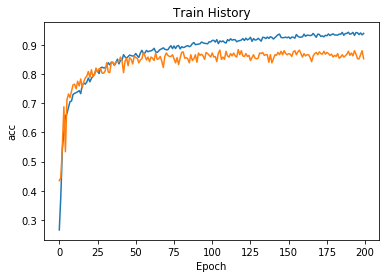

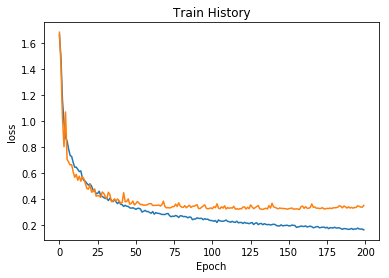

In [10]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [12]:
loss, accuracy = model.evaluate(x_array,y_train_onehot)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

2528/2528 [==============================] - 1s 500us/step

Loss: 0.19, Accuracy: 93.16%


In [0]:
#y_test_onehot = np_utils.to_categorical(y_test)
#print(y_test_onehot)
#score = model.evaluate(tx_array)
Y_pred = model.predict(tx_array)
predictions = model.predict_classes(tx_array)

In [0]:
print(x_test)

In [14]:
print(type(Y_pred))
#print(np_utils.to_categorical(Y_pred))
print(predictions.shape)
print(np_utils.to_categorical(predictions))
#print(len(predictions))

dataframe = pd.DataFrame({'ID':x_test,'Label':predictions})
dataframe.to_csv('UPtest.csv',index=0)
#with open('test2.csv','w',newline='') as csvfile:
#  writer = csv.writer(csvfile)
#  writer.writerow['Label']
#  for i in range(len(predictions)):
#    print(predictions[i])
#    writer.writerow(predictions[i])
  

<class 'numpy.ndarray'>
(10142,)
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [0]:
#print(tstlab)
#print(x_array.shape)
#print(tx_array.shape)
#print(tstimg[0].shape)

#print(x_train[0].shape)